In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# 1. Load the alternative dataset
digits = load_digits()
X, y = digits.data, digits.target

In [3]:
# 2. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 3. Scale the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# 4. Train the SVM Classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
# 5. Evaluate (optional, but good practice)
y_pred_full = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_full)
print(f"Accuracy on digits dataset: {accuracy * 100:.2f}%")

Accuracy on digits dataset: 97.50%


In [13]:
# 6. Generate the visualization as requested
n_samples_to_visualize = 10
# Ensure we don't request more samples than we have
if len(X_test) >= n_samples_to_visualize:
    random_indices = np.random.randint(0, len(X_test), n_samples_to_visualize)
else:
    random_indices = np.arange(len(X_test))

predicted_labels = svm_classifier.predict(X_test[random_indices])

Generating plot with predictions...


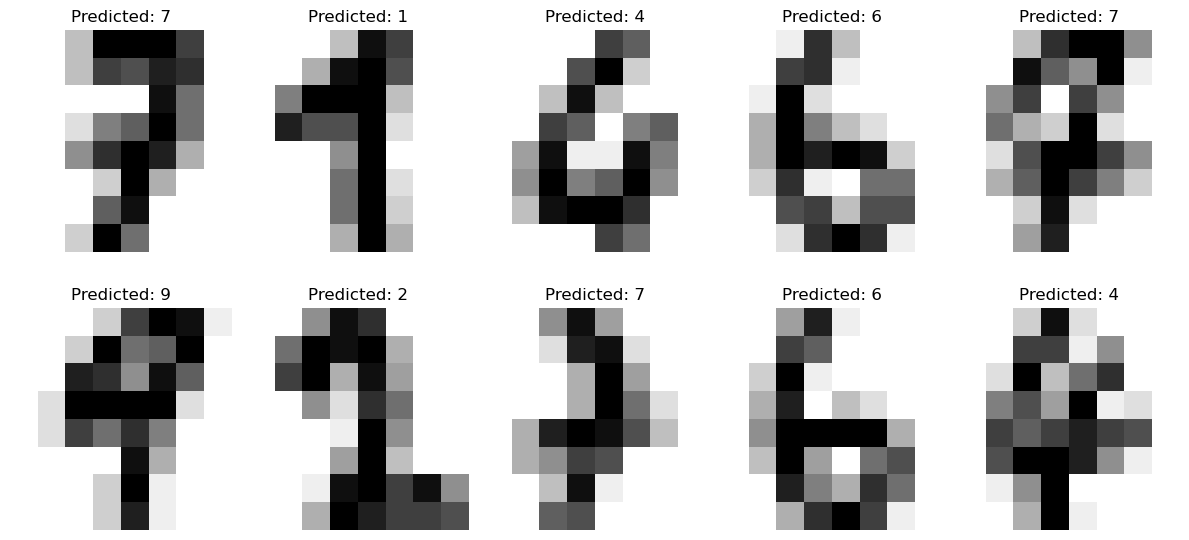

In [15]:
unscaled_images = scaler.inverse_transform(X_test[random_indices])
plt.figure(figsize=(12, 6))
print("Generating plot with predictions...")
for i, idx in enumerate(random_indices):
    prediction = predicted_labels[i]
    
    # Use the unscaled_images[i] instead of X_test[idx]
    image_to_plot = unscaled_images[i] 
    
    plt.subplot(2, 5, i + 1)
    
    # Reshape to 8x8 for this dataset
    plt.imshow(image_to_plot.reshape(8, 8), cmap = plt.cm.gray_r , interpolation = "nearest") 
    
    # Add the prediction as the title
    plt.title(f"Predicted: {prediction}") 
    plt.axis('off')

plt.tight_layout()
plt.show()